In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score, make_scorer, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score


import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

%matplotlib inline

/home/audreybaker/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/audreybaker/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
y_train = pd.read_pickle('y_mtrain_res.pickle')

In [3]:
y_test = pd.read_pickle('y_mtest.pickle')

In [4]:
X_train = pd.read_pickle('X_mtrain_res.pickle')

In [5]:
X_test = pd.read_pickle('X_mtest.pickle')

In [6]:
births_hold = pd.read_pickle('births_hold.pickle')

In [7]:
y_hold = births_hold['risky0']

In [8]:
X_hold = births_hold.drop('risky0', axis = 1)

In [9]:
y_hold.shape

(3510911,)

In [10]:
X_hold.shape

(3510911, 209)

### Confusion Matrix Code

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### KNN

In [ ]:
# score = []
# nn = []
# for i in range(1,200):
#     knn = KNeighborsClassifier(n_neighbors = i)
#     knn.fit(X_train, y_train)
#     score.append(accuracy_score(y_test, knn.predict(X_test)))
#     nn.append(i)

# plt.plot(nn, score)
# plt.title('KNN Accuracy by Nearest Neighbors')
# plt.ylabel('Accuracy')
# plt.xlabel('Nearest Neighbors');
# print('Best KNN Accuracy: ' + str(max(score)))
# print('Best NN value: ' + str(nn[score.index(max(score))]))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = recall_score(y_test, knn.predict(X_test))

print('KNN Recall: '+ str(knn_score))

### Logistic Regression

In [22]:
# parameters = {'n_estimators': np.arange(10,51,10)}
parameters = {'class_weight': [{0:w, 1:1} for w in [.1, .2, .3, .4, .5, .6, .7, .8, .9]]}

lr = LogisticRegression()
ftwo_scorer = make_scorer(fbeta_score, beta=2)
GS = GridSearchCV(estimator = lr, param_grid = parameters, scoring = ftwo_scorer)
GS.fit(X_train,y_train)

#different metrics you can call
GS.score(X_test, y_test)

GS.grid_scores_

GS.best_estimator_

KeyboardInterrupt: 

In [ ]:
print(GS.grid_scores_)

In [19]:
lr = LogisticRegression(class_weight = {0:.1, 1:1})
lr.fit(X_train, y_train)
lr_score_train = (fbeta_score(y_train, lr.predict(X_train), beta=2))
lr_score_test = (fbeta_score(y_test, lr.predict(X_test), beta=2))
lr_accscore_train = accuracy_score(y_train, lr.predict(X_train))
lr_accscore_test = accuracy_score(y_test, lr.predict(X_test))
print('LogReg Test F3: ' + str(lr_score_test))
print('LogReg Train F3:'+str(lr_score_train))
print('LogReg Accuracy Test: '+str(lr_accscore_test))
print('LogReg Accuracy Train: '+ str(lr_accscore_train))

LogReg Test F3: 0.578937890842
LogReg Train F3:0.909090909091
LogReg Accuracy Test: 0.120882501218
LogReg Accuracy Train: 0.5


In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[     1 102884]
 [     0  14146]]


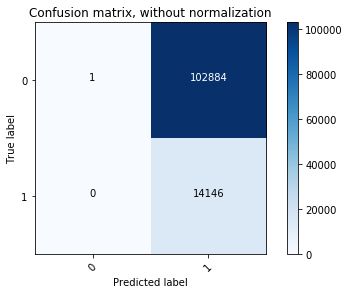

In [21]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [12]:
lr = LogisticRegression(penalty = 'l1')
lr.fit(X_train, y_train)
y_testpp = lr.predict_proba(X_test)
y_trainpp = lr.predict_proba(X_train)
y_testpred = [1 if v[1]>=0.4 else 0 for v in y_testpp]
y_trainpred = [1  if v[1]>=0.4 else 0 for v in y_trainpp]
lr_score_train = (fbeta_score(y_train, y_trainpred, beta=2))
lr_score_test = (fbeta_score(y_test, y_testpred, beta=2))
lr_accscore_train = accuracy_score(y_train, y_trainpred)
lr_accscore_test = accuracy_score(y_test, y_testpred)
print('LogReg Test F2: ' + str(lr_score_test))
print('LogReg Train F2:'+str(lr_score_train))
print('LogReg Accuracy Test: '+str(lr_accscore_test))
print('LogReg Accuracy Train: '+ str(lr_accscore_train))

LogReg Test F2: 0.486414093997
LogReg Train F2:0.730187024385
LogReg Accuracy Test: 0.614922541891
LogReg Accuracy Train: 0.67331087267


In [13]:
lr.classes_

array([0, 1])

In [14]:
y_testpp

array([[ 0.05923811,  0.94076189],
       [ 0.05081906,  0.94918094],
       [ 0.77418885,  0.22581115],
       ..., 
       [ 0.6810154 ,  0.3189846 ],
       [ 0.7388258 ,  0.2611742 ],
       [ 0.65231378,  0.34768622]])

In [15]:
y_testpred

[1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,


In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_testpred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[61396 41489]
 [ 3577 10569]]
Normalized confusion matrix
[[ 0.6   0.4 ]
 [ 0.25  0.75]]


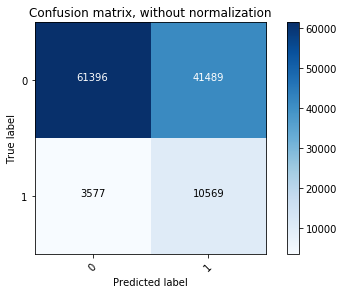

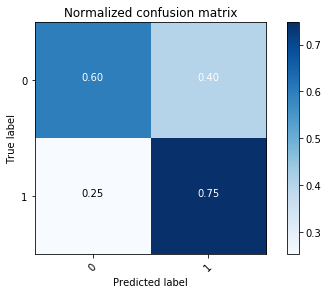

In [17]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

In [18]:
y_holdpp = lr.predict_proba(X_hold)

y_holdpred = [1 if v[1]>=0.4 else 0 for v in y_holdpp]

lr_score_hold = (fbeta_score(y_hold, y_holdpred, beta=2))

lr_accscore_hold = accuracy_score(y_hold, y_holdpred)

print('LogReg Test F2: ' + str(lr_score_test))
print('LogReg Train F2:'+str(lr_score_train))
print('LogReg Hold F2: '+str(lr_score_hold))
print('LogReg Accuracy Test: '+str(lr_accscore_test))
print('LogReg Accuracy Train: '+ str(lr_accscore_train))
print('LogReg Accuracy Hold: '+str(lr_accscore_hold))

LogReg Test F2: 0.486414093997
LogReg Train F2:0.730187024385
LogReg Hold F2: 0.485114066093
LogReg Accuracy Test: 0.614922541891
LogReg Accuracy Train: 0.67331087267
LogReg Accuracy Hold: 0.611588559209


In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_hold, y_holdpred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[1829812 1256735]
 [ 106943  317421]]
Normalized confusion matrix
[[ 0.59  0.41]
 [ 0.25  0.75]]


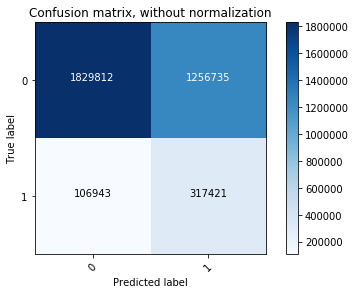

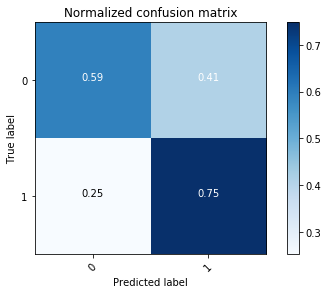

In [20]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

In [21]:
betas = lr.coef_.tolist()

In [22]:
betas = betas[0]

In [23]:
betas

[0.008350228532693996,
 0.015182602819452927,
 0.037327749637615516,
 0.04134424236325284,
 -0.022411008823664195,
 0.006509775162347918,
 0.015681578261442706,
 0.0,
 0.009854819618511527,
 -0.05796522578708567,
 -0.04100513231200636,
 -0.103919305360274,
 0.4865036422381203,
 0.3124487715993564,
 0.0,
 -0.20648935052817263,
 -0.12890327965555945,
 -3.602663526569092e-05,
 0.027495635359291365,
 0.05095312447156627,
 0.0936450096324952,
 0.23851289023975056,
 0.42058489556929873,
 -0.27849999486551885,
 -0.25171695016639706,
 0.34141437395057217,
 0.4580646649818837,
 0.5418730442609997,
 0.0,
 0.0980094850690698,
 0.11643212563054998,
 0.11662468445032056,
 0.14603690375143635,
 0.20994989029817976,
 0.15802718885625372,
 0.25594424498463925,
 -0.17454709307627694,
 0.13748234516498753,
 0.24859979439970015,
 -0.15269799852633548,
 0.24992918453748267,
 -0.13454209697415073,
 0.372339680296771,
 0.7581537814199988,
 0.013384567719379056,
 0.06140862695992906,
 0.00613473683866544,
 0

In [24]:
X_hold.columns

Index(['dob_mm_1', 'dob_mm_2', 'dob_mm_3', 'dob_mm_4', 'dob_mm_5', 'dob_mm_6',
       'dob_mm_7', 'dob_mm_8', 'dob_mm_9', 'dob_mm_10',
       ...
       'gestrec10_1', 'gestrec10_2', 'gestrec10_3', 'gestrec10_4',
       'gestrec10_5', 'gestrec10_6', 'gestrec10_7', 'gestrec10_8',
       'gestrec10_9', 'gestrec10_10'],
      dtype='object', length=209)

In [25]:
col_betas = list(zip(X_hold.columns, betas))

In [26]:
col_betas.sort(key=lambda x: x[1], reverse=True)

In [27]:
betas_df = pd.DataFrame(col_betas)

In [28]:
betas_df.head(50)

,0,1
0,gestrec10_1,4.445152
1,dplural_3,3.516187
2,gestrec10_2,3.129030
3,gestrec10_3,1.875504
4,gestrec10_4,1.486461
5,rf_pdiab_Y,0.934110
6,cig3_r_4,0.768628
7,dplural_2,0.768518
8,dmar_2,0.758154
9,dplural_4,0.559222


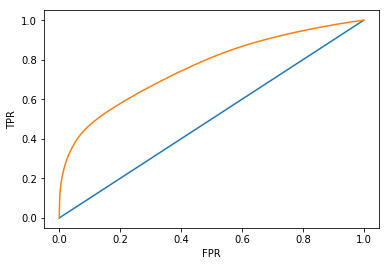

In [29]:

fpr, tpr,_ = roc_curve(y_hold, y_holdpp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

### SVC

### Naive Bayes

In [59]:
nb = BernoulliNB(class_prior=[.86,.14])
nb.fit(X_train, y_train)
nb_score_train = (recall_score(y_train, nb.predict(X_train)))
nb_score_test = (recall_score(y_test, nb.predict(X_test)))
print('Naive Bayes Test Recall: ' + str(nb_score_test))
print('Naive Bayes Train Recall:'+str(nb_score_train))

LogReg Test Recall: 0.420118761487
LogReg Train Recall:0.431874610906


In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, nb.predict(X_test))
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[89963 12922]
 [ 8203  5943]]


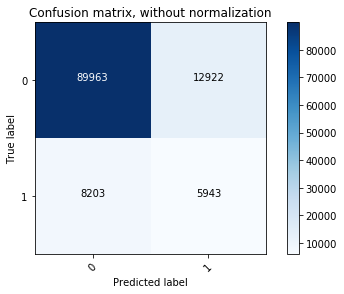

In [61]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.58  0.42]]


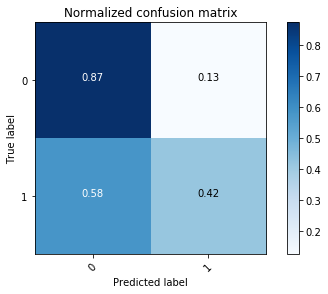

In [62]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

### Random Forest

In [ ]:
# parameters = {'n_estimators': np.arange(10,51,10)}
parameters = {'min_samples_split': np.arange(10, 50, 10)}

rf = RandomForestClassifier(n_estimators = 500)
ftwo_scorer = make_scorer(fbeta_score, beta=3)
GS = GridSearchCV(estimator = rf, param_grid = parameters, scoring = ftwo_scorer)
GS.fit(X_train,y_train)

#different metrics you can call
GS.score(X_test, y_test)

print(GS.grid_scores_)

print(GS.best_estimator_)

In [ ]:
rf = RandomForestClassifier(n_estimators = 500, min_samples_split=10)
rf.fit(X_train, y_train)
rf_f3score_train = (fbeta_score(y_train, rf.predict(X_train), beta=4))
rf_f3score_test = (fbeta_score(y_test, rf.predict(X_test), beta=4))
rf_accuracy_train = accuracy_score(y_train, rf.predict(X_train))
rf_accuracy_test = accuracy_score(y_test, rf.predict(X_test))
print('Random Forest Test F3: ' + str(rf_f3score_test))
print('Random Forest Train F3:'+str(rf_f3score_train))
print('Random Forest Test Accuracy: '+ str(rf_accuracy_test))
print('Random Forest Train Accuracy: '+str(rf_accuracy_train))

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf.predict(X_test))
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[95988  6897]
 [ 8252  5894]]


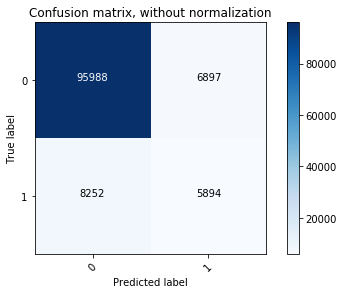

In [13]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.58  0.42]]


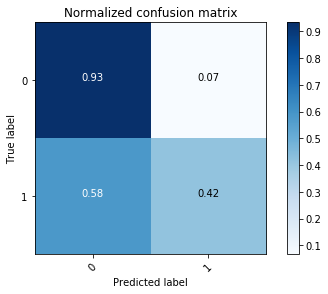

In [14]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

### Neural Net